In [3]:
import numpy as np

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt

import cv2

In [4]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"opencv-python=={cv2.__version__}")

numpy==1.20.3
matplotlib==3.4.2
opencv-python==4.10.0


### Imagen Thresholding

La umbralización (thresholding) es el método más simple de la segmentación de imágenes cuyo objetivo es separar un objeto de interés del fondo de una imagen. Hay que tomar en cuenta que para su aplicación deben emplearse imágenes en las que el objeto y el fondo sean diferenciables, ya que si no lo son, va a ser mucho más difícil determinar dicho objeto.

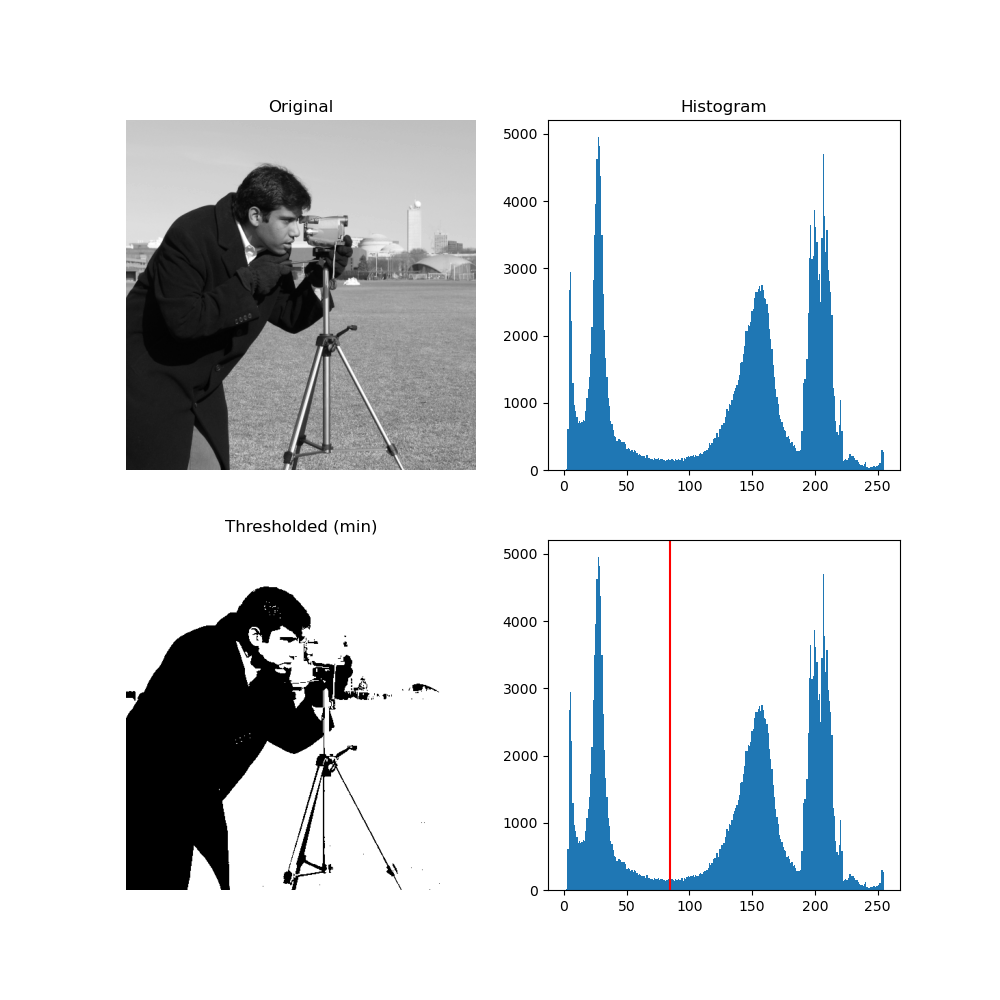

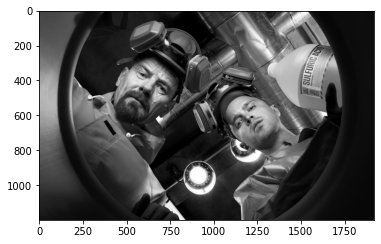

In [5]:
img_thresh = cv2.imread("../Data/imagenes/ejemplo_thresholding.jpg")

# Para aplicar thresholding es recomendable transformar la imagen a escala de grises

img_thresh = cv2.cvtColor(src = img_thresh, code = cv2.COLOR_BGR2GRAY)

plt.imshow(img_thresh, cmap = "gray")
plt.show()

In [6]:
img_thresh.flatten()

array([73, 71, 69, ...,  7,  7,  7], dtype=uint8)

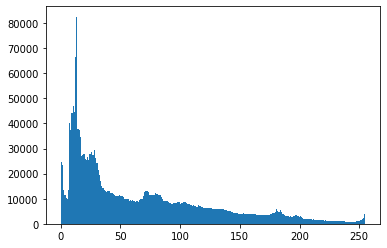

In [7]:
plt.hist(img_thresh.flatten(), bins = 256);

### Thresholding Binario

Transforma los numero de la imagen a 0 o 1 dependiendo si el pixel es mayor o menor a el valor de **`thresh`**.

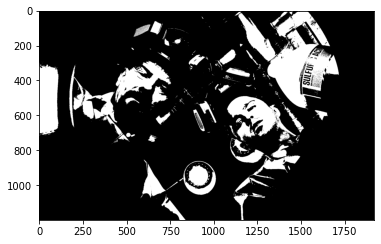

In [8]:
thresh, img_thresh2 = cv2.threshold(src = img_thresh,
                                   thresh = 127,
                                   maxval = 255,
                                   type = cv2.THRESH_BINARY)

plt.imshow(img_thresh2, cmap = "gray")
plt.show()

### Thresholding Binario Inverso

In [9]:
# Imagen Original

img_thresh = cv2.imread("../Data/imagenes/ejemplo_thresholding.jpg")

img_thresh = cv2.cvtColor(src = img_thresh, code = cv2.COLOR_BGR2GRAY)

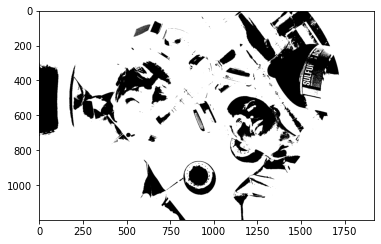

In [10]:
thresh, img_thresh2 = cv2.threshold(src = img_thresh,
                                   thresh = 127,
                                   maxval = 255,
                                   type = cv2.THRESH_BINARY_INV)

plt.imshow(img_thresh2, cmap = "gray")
plt.show()

### Thresholding Truncado

Transforma los numeros de la imagen al valor de **`tresh`** si son mayores a **`thresh`**, de lo contrario no los modifica. Se ignora **`maxval`**.

In [11]:
# Imagen Original

img_thresh = cv2.imread("../Data/imagenes/ejemplo_thresholding.jpg")

img_thresh = cv2.cvtColor(src = img_thresh, code = cv2.COLOR_BGR2GRAY)

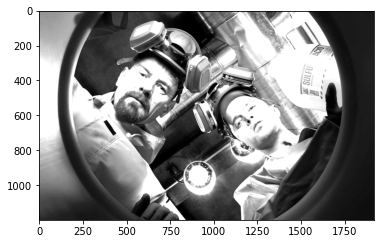

In [12]:
thresh, img_thresh2 = cv2.threshold(src = img_thresh,
                                   thresh = 120,
                                   maxval = 255,
                                   type = cv2.THRESH_TRUNC)

plt.imshow(img_thresh2, cmap = "gray")
plt.show()

### Thresholding a Cero

Transforma a cero todos los pixeles que sean menor a **`thresh`**. Se ignora **`maxval`**.

In [13]:
# Imagen Original

img_thresh = cv2.imread("../Data/imagenes/ejemplo_thresholding.jpg")

img_thresh = cv2.cvtColor(src = img_thresh, code = cv2.COLOR_BGR2GRAY)

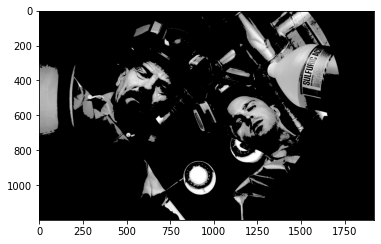

In [14]:
thresh, img_thresh2 = cv2.threshold(src = img_thresh,
                                   thresh = 127,
                                   maxval = 255,
                                   type = cv2.THRESH_TOZERO)

plt.imshow(img_thresh2, cmap = "gray")
plt.show()

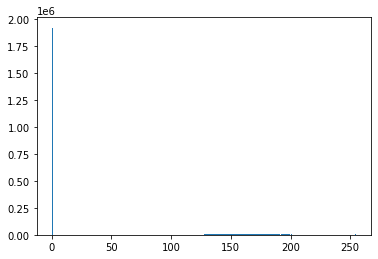

In [15]:
plt.hist(img_thresh2.flatten(), bins = 256);

### Thresholding a Cero Invertido

In [16]:
# Imagen Original

img_thresh = cv2.imread("../Data/imagenes/ejemplo_thresholding.jpg")

img_thresh = cv2.cvtColor(src = img_thresh, code = cv2.COLOR_BGR2GRAY)

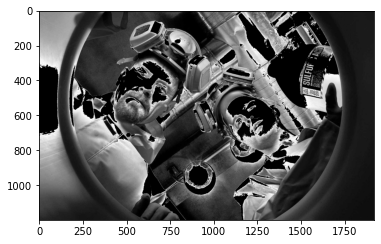

In [17]:
thresh, img_thresh2 = cv2.threshold(src = img_thresh,
                                   thresh = 127,
                                   maxval = 255,
                                   type = cv2.THRESH_TOZERO_INV)

plt.imshow(img_thresh2, cmap = "gray")
plt.show()

### Ejemplo de aplicacion

Queremos separar el texto de la siguiente imagen del fondo gris.

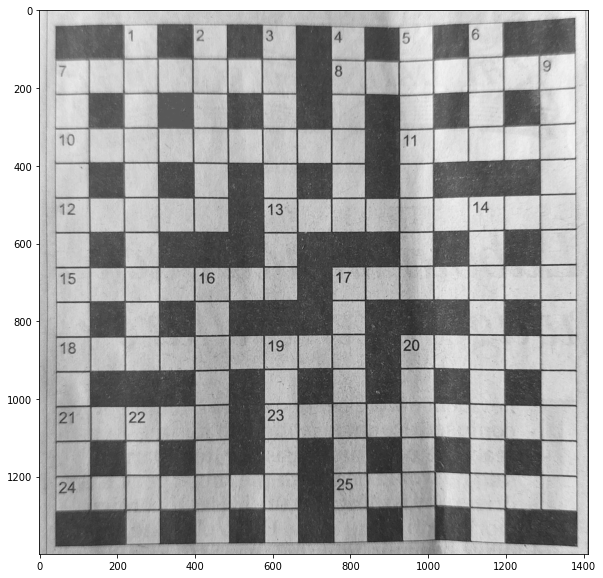

In [18]:
# Usando flags = 0, leemos la imagen en escala de grises en lugar de BGR

img = cv2.imread("../Data/imagenes/crossword.jpg", flags = 0)

plt.figure(figsize = (10, 10))
plt.imshow(img, cmap = "gray")
plt.show()

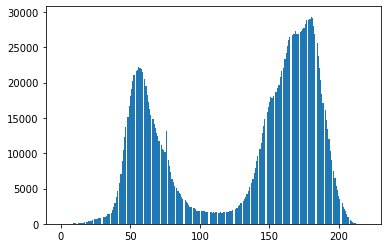

In [19]:
plt.hist(img.flatten(), bins = 256);

### Thresholding Binario

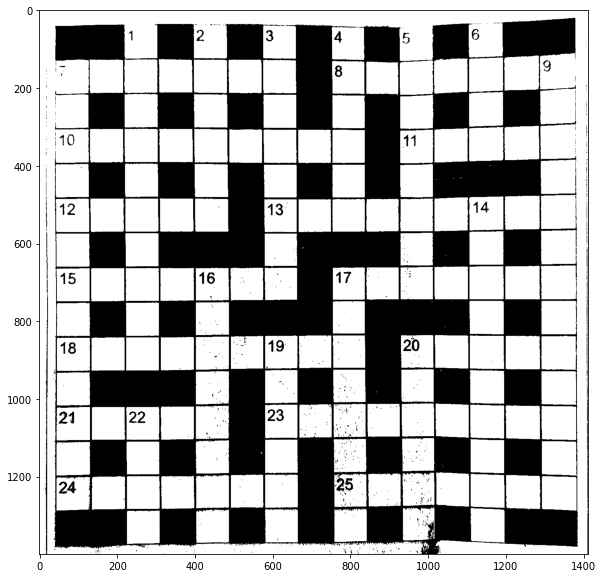

In [20]:
thresh, img_1 = cv2.threshold(src    = img,
                              thresh = 127,
                              maxval = 255,
                              type   = cv2.THRESH_BINARY)

plt.figure(figsize = (10, 10))
plt.imshow(img_1, cmap = "gray")
plt.show()

### Adaptive Threshold

- **`blockSize`**: Tamaño de la "vecindad" de píxeles que se utiliza para calcular el **`threshold`**.
- **`C`**: Constante restada de la media o media ponderada.

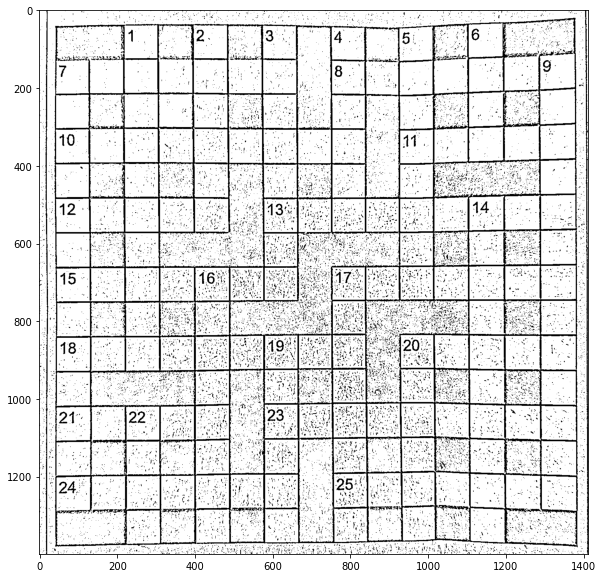

In [21]:
img_2 = cv2.adaptiveThreshold(src            = img,
                              maxValue       = 255,
                              adaptiveMethod = cv2.ADAPTIVE_THRESH_MEAN_C,
                              thresholdType  = cv2.THRESH_BINARY,
                              blockSize      = 11,
                              C              = 8)

plt.figure(figsize = (10, 10))
plt.imshow(img_2, cmap = "gray")
plt.show()

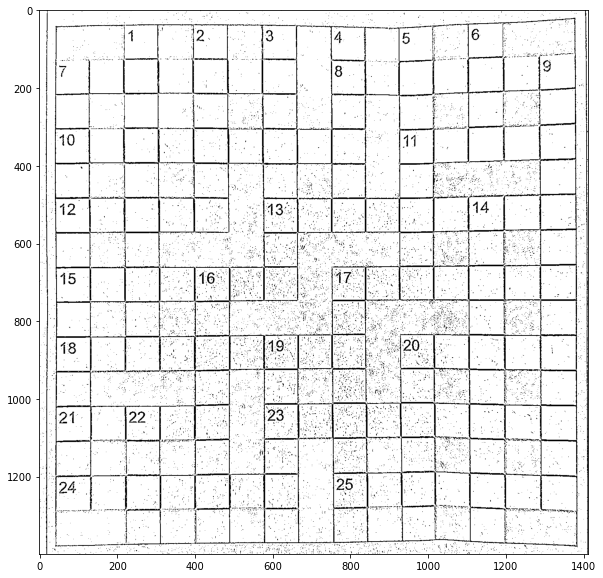

In [22]:
img_3 = cv2.adaptiveThreshold(src            = img,
                              maxValue       = 255,
                              adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              thresholdType  = cv2.THRESH_BINARY,
                              blockSize      = 11,
                              C              = 10)

plt.figure(figsize = (10, 10))
plt.imshow(img_3, cmap = "gray")
plt.show()

### Union: img_1, img_2

In [23]:
#https://www.custompetcollars.co.uk/cdn/shop/products/Screen_Shot_2017-11-23_at_6.41.22_pm_900x.png?v=1523304219

In [24]:
img = cv2.imread("../Data/imagenes/pelota.jpg")

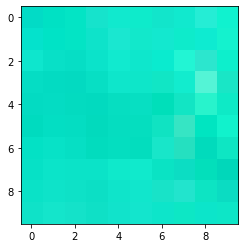

In [25]:
plt.imshow(img[270:280, 290:300])
plt.show()

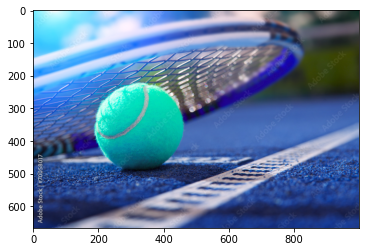

In [26]:
plt.imshow(img)
plt.show()

In [98]:
mins = []
maxs = []
for i in range(3):
    mins.append(img[270:280, 290:300][:, :, i].min())
    maxs.append(img[270:280, 290:300][:, :, i].max())

In [100]:
mins, maxs

([0, 215, 186], [84, 245, 214])

In [127]:
mask = np.ones(img.shape[:2]).astype(bool)
for i in range(3):
    temp_mask = (img[:, :, i] > (mins[i]-40)) & (img[:, :, i] < (maxs[i]+0))
    mask = mask & temp_mask

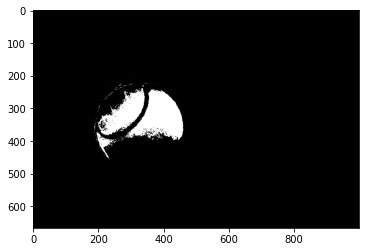

In [128]:
plt.imshow(mask, cmap = "gray")

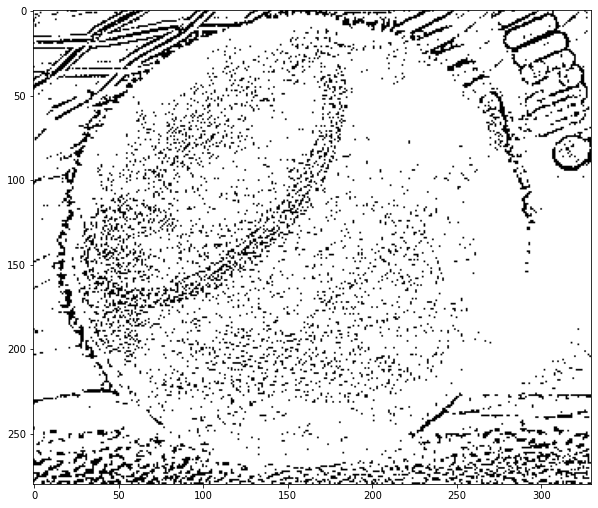

In [186]:
img_3 = cv2.adaptiveThreshold(src            = img_vr,
                              maxValue       = 255,
                              adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              thresholdType  = cv2.THRESH_BINARY,
                              blockSize      = 5,
                              C              = 4)

plt.figure(figsize = (10, 10))
plt.imshow(img_3, cmap = "gray")
plt.show()

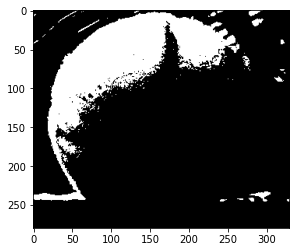

In [175]:
thresh, img_thresh2 = cv2.threshold(src = img_vr,
                                   thresh = 200,
                                   maxval = 255,
                                   type = cv2.THRESH_BINARY)

plt.imshow(img_thresh2, cmap = "gray")
plt.show()

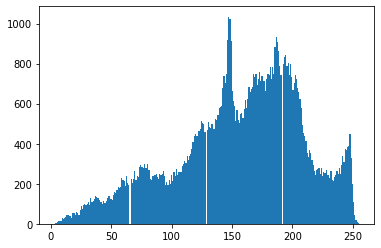

In [172]:
plt.hist(img_vr.flatten(), bins = 256);

In [ ]:
union = cv2.addWeighted(src1 = img_1, alpha = 0.7, src2 = img_2, beta = 0.3, gamma = 0)

plt.figure(figsize = (10, 10))
plt.imshow(union, cmap = "gray")
plt.show()

In [ ]:
################################################################################################################################